In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl


In [2]:
# open data
data = pd.read_csv('data/hiphop-nl.csv')
num_data = data.iloc[:, 3:]
num_data.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,48,0.776,0.800,7,-5.178,1,0.181,0.2210,0.000,0.405,0.509,97.949
1,24,0.705,0.825,10,-5.493,0,0.288,0.0580,0.000,0.254,0.585,146.118
2,44,0.757,0.865,10,-4.955,0,0.202,0.1500,0.000,0.145,0.833,90.016
3,28,0.525,0.745,1,-6.157,1,0.404,0.0671,0.000,0.160,0.383,82.967
4,39,0.685,0.735,1,-7.370,1,0.085,0.1820,0.238,0.113,0.178,89.468


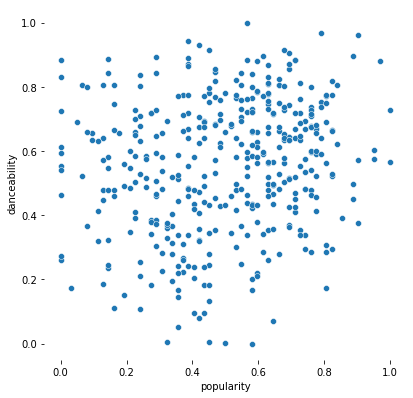

In [3]:
num_data.loc[:] = MinMaxScaler().fit_transform(num_data.loc[:])

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='popularity', y='danceability', data=num_data, ax=ax)
plt.show()

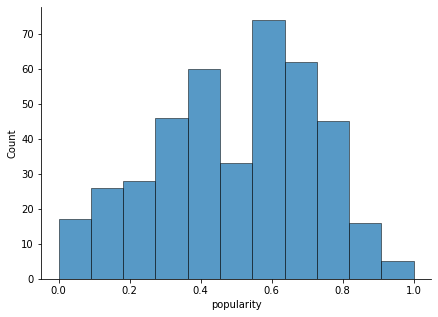

In [4]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    num_data,
    x="popularity",
    multiple="stack",
    linewidth=.5
)

plt.show()

In [5]:
for el in num_data['popularity']:
    print(el)

0.7741935483870968
0.3870967741935484
0.7096774193548387
0.45161290322580644
0.6290322580645161
0.4032258064516129
0.43548387096774194
0.4838709677419355
0.45161290322580644
0.4032258064516129
0.3387096774193548
0.27419354838709675
0.3548387096774194
0.6451612903225806
0.7419354838709677
0.4193548387096774
0.5967741935483871
0.7258064516129032
0.6290322580645161
0.3225806451612903
0.3064516129032258
0.45161290322580644
0.6451612903225806
0.4193548387096774
0.22580645161290322
0.3870967741935484
0.25806451612903225
0.24193548387096775
0.2096774193548387
0.1935483870967742
0.3387096774193548
0.3225806451612903
0.16129032258064516
0.3387096774193548
0.4032258064516129
0.5806451612903225
0.6935483870967741
0.6935483870967741
0.6774193548387096
0.5806451612903225
0.5806451612903225
0.6612903225806451
0.6290322580645161
0.7580645161290323
0.0
0.6774193548387096
0.6451612903225806
0.3709677419354839
0.0
0.7419354838709677
0.5967741935483871
0.6612903225806451
0.45161290322580644
0.58064516129